In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
from scipy.stats import linregress
from statistics import median
from scipy.optimize import fminbound
import json
import itertools
from tqdm.notebook import tqdm

import mpmath as mp
mp.mp.dps = 50
mp.mp.pretty = True
print(mp.mp)

Mpmath settings:
  mp.prec = 169               [default: 53]
  mp.dps = 50                 [default: 15]
  mp.trap_complex = False     [default: False]


In [2]:
T_crit = {}
C_crit = {}
for D in tqdm([0.0, 0.5, 1.0, 1.5, 1.75, 1.87, 1.9, 1.92, 1.95, 1.99, 1.962
                        #1.875, 1.9, 1.92, 1.9375, 1.95, 1.96,
                        #1.962, 1.963, 1.964, 1.965, 1.966, 1.967, 1.968, 1.96875, 1.969,
                        #1.97, 1.99,
                        #1.992
              ]):
#D = 0.0
    T_crit[D] = {}
    C_crit[D] = {}
    with open("./tmp/T_crit_D{}.txt".format(D), 'r') as fp:
        data = json.load(fp);
        for L in data:
            T = data[L]['T_crit']
            C = data[L]['C_crit']
        #for line in fp:
        #    L, T, C = line.split()
            T_crit[D][int(L)] = float(T)
            C_crit[D][int(L)] = float(C)

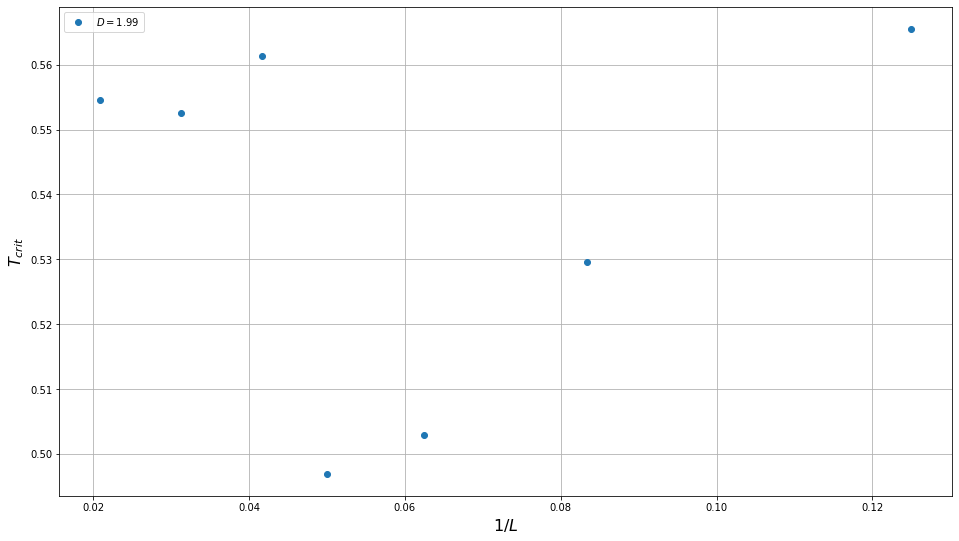

In [3]:
plt.figure(figsize=(16, 9))

D = 1.99

x = np.array([L for L in T_crit[D].keys()])
y = np.array([T for L, T in T_crit[D].items()])

plt.plot(1 / x, y, 'o', label="$D={}$".format(D))
#plt.yscale('log')
#plt.xscale('log')
#plt.title("$D={}$".format(D), fontsize=16)
plt.xlabel(r'$1/L$', fontsize=16)
plt.ylabel(r"$T_{crit}$", fontsize=16)
plt.legend()
plt.grid(True, which="both")
plt.show()

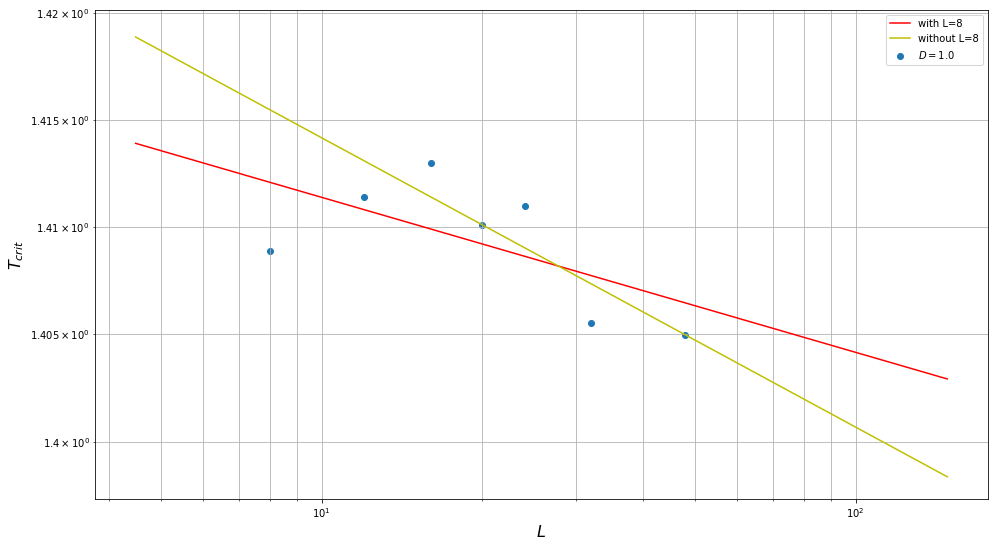

In [41]:
x = np.array([L for L in T_crit[D].keys()])
y = np.array([T for L, T in T_crit[D].items()])

plt.figure(figsize=(16, 9))
plt.scatter(x, y, label="$D={}$".format(D))

l = 0
fit = np.polyfit(np.log(x[l:]), np.log(y[l:]), 1, full=False)
sample = np.linspace(1.5, 5, 20)
plt.plot(np.exp(sample), np.exp(fit[0] * sample + fit[1]), 'r', label="with L=8")

l = 1
fit = np.polyfit(np.log(x[l:]), np.log(y[l:]), 1, full=False)
sample = np.linspace(1.5, 5, 20)
plt.plot(np.exp(sample), np.exp(fit[0] * sample + fit[1]), 'y', label="without L=8")


plt.xlabel(r'$L$', fontsize=16)
plt.ylabel(r"$T_{crit}$", fontsize=16)
plt.yscale("log")
plt.xscale("log")
plt.grid(True, which="both")
plt.legend()
plt.show()
#plt.savefig("./finite_size_D{}.png".format(D))

In [42]:
l = 0
p, V = np.polyfit(1/x[l:], y[l:], 1, cov=True)
print("with L=8")
print("slope: \t{} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("shift: \t{} +/- {}".format(p[1], np.sqrt(V[1][1])))

l = 1
p, V = np.polyfit(1/x[l:], y[l:], 1, cov=True)
print("without L=8")
print("slope: \t{} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("shift: \t{} +/- {}".format(p[1], np.sqrt(V[1][1])))


with L=8
slope: 	0.035882603841784655 +/- 0.03446927182381926
shift: 	1.4071245851726775 +/- 0.002335000906980619
without L=8
slope: 	0.11874331757135322 +/- 0.04341404688366721
shift: 	1.40357910271021 +/- 0.0022764721582096857
